# How to successfully shoot in the NBA

### NBA Shot Log for the season 2014/2015. Looking for a way to maximize the scoring success

### Dataset Overview

The dataset provides data about 126974 shots taken during the NBA Regular Season 2014/2015. Each row records information like the _shooter_, the _shot type_, the _distance_ from the basket, the _result_, the _closest defender_ distance or information about at what time of the match the shot was taken.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

all_shots = pd.read_csv('shots_log_master.csv')

Through this data we will try to understand which were the best shooting conditions in terms of:

- **Distance from the basket**<br>
- **Distance from the defender**<br>
- **Touch time and number of dribbles**

### Shots Distribution

In the 2014/2015 season, there still was a big difference in the number of _Two Point_ and _Three Point_ shots number.<br>
Two Pointers are about 3/4 of the total number of shots taken

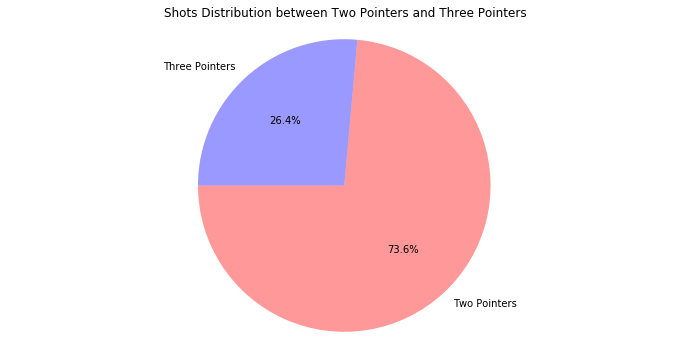

In [2]:
all_shots_copy = all_shots.copy()
colors = sb.color_palette()[0]
shot_types = ['Two Pointers', 'Three Pointers']

shots_type = all_shots_copy.groupby('pts_type')['pts_type'].count()


plt.figure(figsize=[12, 6]);
plt.pie(shots_type, labels=shot_types, autopct='%1.1f%%', shadow=False, startangle=180, colors=['r', 'b'],wedgeprops={'alpha':0.4})
plt.title('Shots Distribution between Two Pointers and Three Pointers');
plt.axis('equal');

With Two Pointers accounting for a scoring percentage of 48.9% and Three Pointers of 35%

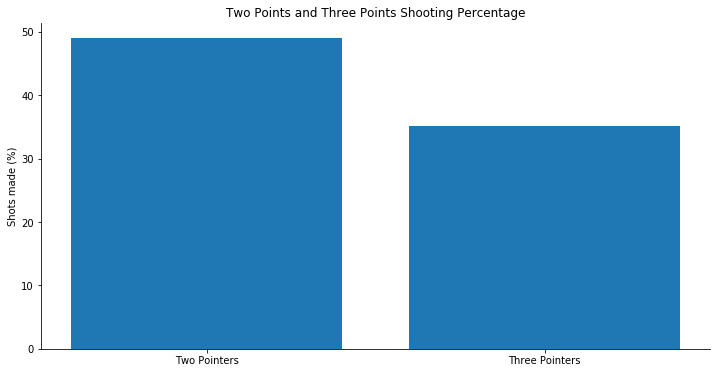

In [3]:
two_pointers_pct = all_shots_copy.query('pts_type == 2 and shot_result == "made"')['pts_type'].count() / all_shots_copy[all_shots_copy.pts_type == 2]['pts_type'].count()
three_pointers_pct = all_shots_copy.query('pts_type == 3 and shot_result == "made"')['pts_type'].count() / all_shots_copy[all_shots_copy.pts_type == 3]['pts_type'].count()
shots_pct = [two_pointers_pct * 100, three_pointers_pct  * 100]

plt.figure(figsize = [12, 6]);
plt.bar(x=['Two Pointers', 'Three Pointers'], height=shots_pct);
plt.ylabel('Shots made (%)');
plt.title('Two Points and Three Points Shooting Percentage');
sb.despine(left=False, bottom=False, right=True)

## Shooting from (how) far?

As mentioned before, distance is surely one of the main characteristics of a shot. It's easy to think that the closest to the basket the easiest the shot can be

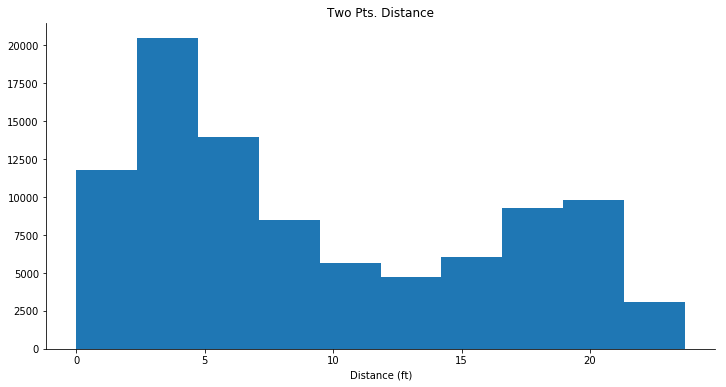

In [4]:
two_pts = all_shots_copy[all_shots_copy.pts_type == 2]
three_pts = all_shots_copy[all_shots_copy.pts_type == 3]

plt.figure(figsize = [12, 6]);

# Two pointers
bin_edges = np.arange(0, int(two_pts.shot_dist.max()) + 1, 5) 
plt.title('Two Pts. Distance');
plt.xlabel('Distance (ft)');
plt.hist(two_pts.shot_dist);
plt.xticks(bin_edges, bin_edges);
sb.despine(left=False, bottom=False, right=True)

Two Pointers show that this is not necessarily true. 

We can see that the highest peak are shots taken from within 5 ft from the basket, but this distribution is bimodal and shows another interesting peak in the number of shots taken between 16 and 21 ft from the basket.

This is due to a drastic drop in the efficiency which starts from 5-6ft distance from the basket.<br>
The reasons for such efficiency drop could be connected to the defences collapsing into the _paint_ (the area right in front of the basket) making _midrange_ shots less convenient.

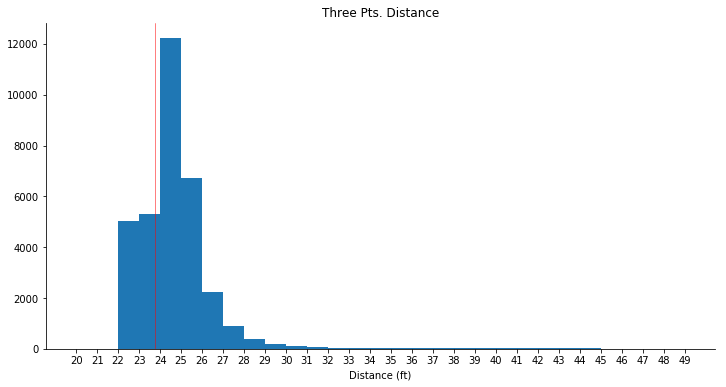

In [5]:
plt.figure(figsize = [12, 6]);
# Three pointers
bin_edges = np.arange(20, 50, 1)
plt.hist(three_pts.shot_dist, bins=bin_edges)
plt.axvline(x=23.75, linewidth=0.5, color='r');
plt.title('Three Pts. Distance');
plt.xticks(bin_edges, bin_edges);
plt.xlabel('Distance (ft)');
sb.despine(left=False, bottom=False, right=True)

The Three Points distance distribution is right skewed and shows that most of the shots were taken between the "shortest" distance possible (shooting Three Pointers from the arc, 23.75 ft from the basket, starts from the red line on the plot).

Three pointers from at least 22 ft are taken from the side of the court, where three points shots are actually closer).

In both Three Pointers distances we can see that players don't suffer much shooting at least 1 ft further from the line.

## Where's the defender?

In all this, let's see where the defender is positioned when a player shoots

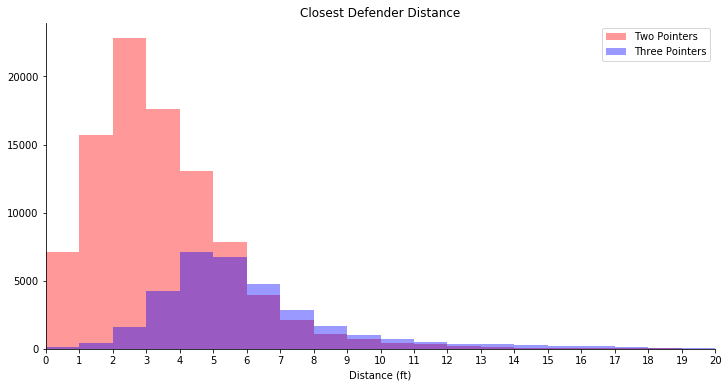

In [6]:
plt.figure(figsize = [12, 6]);
plt.title('Closest Defender Distance');

# Two pointers
two_bin_edges = np.arange(0, int(two_pts.close_def_dist.max()) + 1, 1) 
plt.hist(two_pts.close_def_dist, color ='r', alpha=0.4, bins= two_bin_edges);

# Three pointers
three_bin_edges = np.arange(0, int(three_pts.close_def_dist.max()) + 1, 1)
plt.hist(three_pts.close_def_dist, color ='b', alpha=0.4, bins = three_bin_edges);


plt.xticks(two_bin_edges, two_bin_edges);

plt.xlabel('Distance (ft)');
plt.xlim(0, 20); # more than 20 ft of distance is when a shot is "desperate"
plt.legend(shot_types, prop={'size': 10});
sb.despine(left=False, bottom=False, right=True)

Both distributions are right-skewed and show a peak of Two Points shots taken between 2 and 4 ft from the defender, while the Three Points shots have the defender between 4 and 6 ft.

Both plots seem almost _normally distributed_ within the distances 0-6ft for Two Pointers and 2-9 ft for Three Pointers).

This difference in the distance from the defender can be explained by the lower efficiency of three points shots and by the fact that Two Pointers are taken from a more crowded area of the court.

## Waiting for a shot

When do attackers decide to attack? Does the shot come right after leaving a screen or do players prefer isolating and taking more time (and dribbles) before shooting?

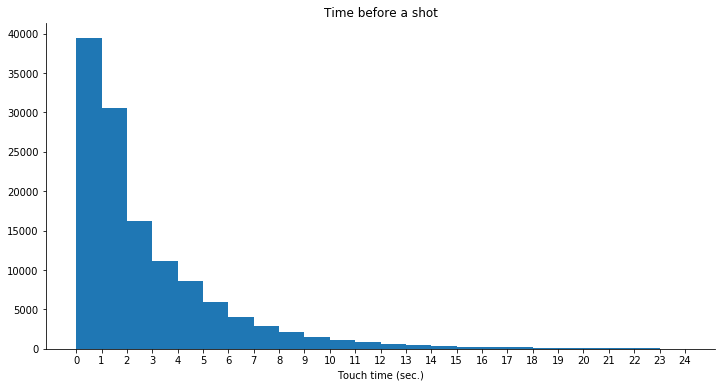

In [7]:
# time before a shot
plt.figure(figsize = [12, 6]);
plt.title('Time before a shot');

bin_edges = np.arange(0, int(all_shots_copy.touch_time.max()) + 1, 1) 

plt.hist(all_shots_copy.touch_time, bins = bin_edges);
plt.xticks(bin_edges, bin_edges);
plt.xlabel('Touch time (sec.)');
sb.despine(left=False, bottom=False, right=True)

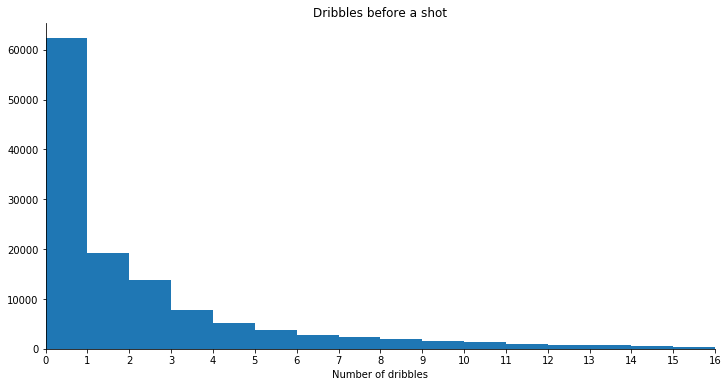

In [8]:
# dribbles before a shot
plt.figure(figsize = [12, 6]);
plt.title('Dribbles before a shot');

bin_edges = np.arange(0, int(all_shots_copy.dribbles.max()) + 1, 1) 

plt.hist(all_shots_copy.dribbles, bins = bin_edges);
plt.xticks(bin_edges, bin_edges);
plt.xlim(0, 16); # the plot is strongly right skewed and after 16 dribbles there's not much data
plt.xlabel('Number of dribbles');
sb.despine(left=False, bottom=False, right=True)

Shots are taken mostly within 2 seconds of touch time and within 2 dribbles. They've got to be fast!

Speed is a fundamental quality and in order to be an effective attacker, the execution of a shot needs to be fast enought anticipate the arrival of a defender.

These plots aggregate two pointers and three pointers and, since this seems an influencing parameter in the choice of a shot, we'll further investigate it later trying to understand if two pointers and three pointers follow the same rule in this case.

## Shot efficiency

Let's see now if these variables (shot distance, defender distance, touch time duration or dribbles) have some relationship with the percentage of making a successful shot.

We examine distance from the basket for the Two Pointers first

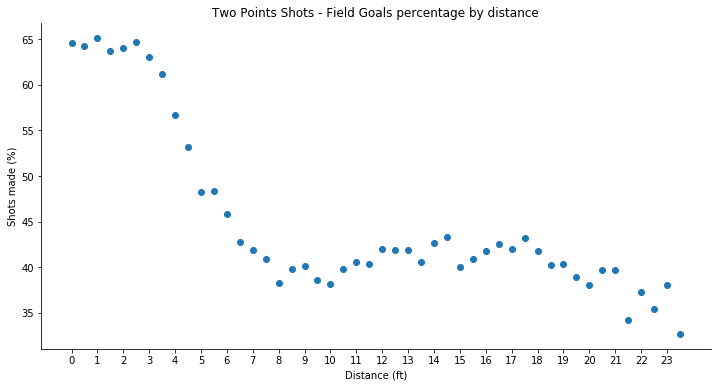

In [26]:
plt.figure(figsize = [12, 6]);

bins_size = np.arange(0, two_pts.shot_dist.max() + 0.8, 0.5)
bins_labels = bins_size[:-1]
two_pts_plot_labels = np.arange(0, int(two_pts.shot_dist.max()) + 1, 1)
two_pts.loc[:, 'shot_bin'] = pd.cut(two_pts.shot_dist, bins = bins_size, labels = bins_labels, include_lowest = True)

two_pts_by_bins = two_pts.groupby(['shot_bin', 'shot_result']).count()
two_pts_by_bins = two_pts_by_bins.reset_index()
two_pts_by_bins = two_pts_by_bins.pivot(index = "shot_bin", columns="shot_result", values="game_id")
two_pts_by_bins.loc[:, 'dist_pct'] = two_pts_by_bins.made / (two_pts_by_bins.made + two_pts_by_bins.missed) * 100

plt.scatter(x = two_pts_by_bins.index, y = two_pts_by_bins.dist_pct);
plt.xticks(two_pts_plot_labels, two_pts_plot_labels);
plt.ylabel('Shots made (%)');
plt.xlabel('Distance (ft)');
plt.title('Two Points Shots - Field Goals percentage by distance');
sb.despine(left=False, bottom=False, right=True)

As expected, the relationship is negative.

We can notice a raise in the percentage for the shots taken outside the paint: this is connected to the bimodal distribution we saw earlier: shots within 5 ft from the basket are probably the most valuable for teams. Further from 5ft there's an area where the FG% decreases (and decreases the number of shots taken, as seen earlier): these shots, that we can call _mid range shots_ are less and less interesting for the teams which prefer skipping shots from this distance and take _long two_ shots instead.

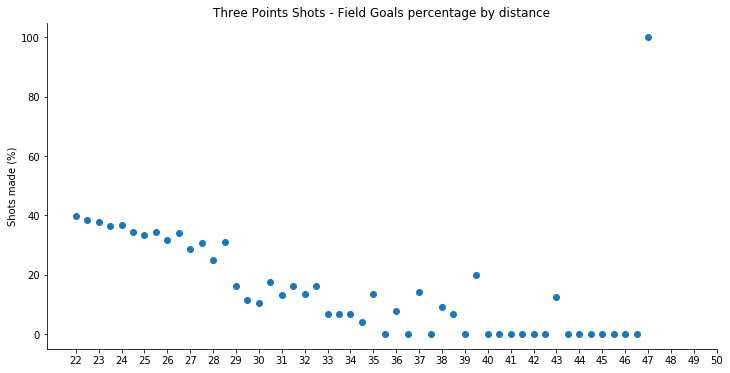

In [10]:
plt.figure(figsize = [12, 6]);

bins_size = np.arange(22, three_pts.shot_dist.max() + 3.3, 0.5)
bins_labels = bins_size[:-1]
three_pts_plot_labels = np.arange(22, int(three_pts.shot_dist.max()) + 4, 1)

three_pts.loc[:, 'shot_bin'] = pd.cut(three_pts.shot_dist, bins =bins_size, labels = bins_labels, include_lowest = True)

three_pts_by_bins = three_pts.groupby(['shot_bin', 'shot_result']).count()

three_pts_by_bins = three_pts_by_bins.reset_index()
three_pts_by_bins = three_pts_by_bins.pivot(index = "shot_bin", columns="shot_result", values="game_id")

# setting NaN to 0
three_pts_by_bins.loc[three_pts_by_bins.missed.isna(), "missed"] = 0
three_pts_by_bins.loc[three_pts_by_bins.made.isna(), "made"] = 0

three_pts_by_bins.loc[:, 'made'] = three_pts_by_bins.made.round(0).astype(int)
three_pts_by_bins.loc[:, 'missed'] = three_pts_by_bins.missed.round(0).astype(int)

three_pts_by_bins.loc[:, 'dist_pct'] = three_pts_by_bins.made / (three_pts_by_bins.made + three_pts_by_bins.missed) * 100
three_pts_by_bins.loc[three_pts_by_bins.dist_pct.isna(), "pct"] = 0

plt.scatter(x = three_pts_by_bins.index, y = three_pts_by_bins.dist_pct);
plt.xticks(three_pts_plot_labels, three_pts_plot_labels);
plt.ylabel('Shots made (%)');
plt.title('Three Points Shots - Field Goals percentage by distance');
sb.despine(left=False, bottom=False, right=True)

Three pointers show an expected negative relationship too.

In this case, the decrease in the FGs made is constant (excluding the outliers between 35 and 43 ft, due to the very low number of shots taken).

It's remarkable the 1/1 from 46.9 ft by Derrick Rose!

### Time factor

Considering the dimensions of the court and the small space available when attacking halfcourt, here is how the speed in shooting influence the shots percentage

In [11]:
# cutting the Two Point shots into bins
bins_size = np.arange(0, 24 + 1, 0.2)
bins_labels = bins_size[:-1]
touch_time_plot_labels = np.arange(0, int(two_pts.touch_time.max()) + 1, 1)

two_pts.loc[:, 'touch_time_bin'] = pd.cut(two_pts.touch_time, bins =bins_size, labels = bins_labels, include_lowest = True)

# counting the number of shots taken by bin
two_pts_by_touch_time = two_pts.groupby(['touch_time_bin', 'shot_result']).count()

two_pts_by_touch_time = two_pts_by_touch_time.reset_index()
two_pts_by_touch_time = two_pts_by_touch_time.pivot(index = "touch_time_bin", columns="shot_result", values="game_id")

# setting NaN to 0
two_pts_by_touch_time.loc[two_pts_by_touch_time.missed.isna(), "missed"] = 0
two_pts_by_touch_time.loc[two_pts_by_touch_time.made.isna(), "made"] = 0

two_pts_by_touch_time.loc[:, 'made'] = two_pts_by_touch_time.made.round(0).astype(int)
two_pts_by_touch_time.loc[:, 'missed'] = two_pts_by_touch_time.missed.round(0).astype(int)

# FG% by bin
two_pts_by_touch_time.loc[:, 'touch_time_pct'] = two_pts_by_touch_time.made / (two_pts_by_touch_time.made + two_pts_by_touch_time.missed) * 100
two_pts_by_touch_time.loc[two_pts_by_touch_time.touch_time_pct.isna(), "touch_time_pct"] = 0

In [12]:
# cutting the Three Point shots into bins
bins_size = np.arange(0, 24 + 1, 0.2)
bins_labels = bins_size[:-1]
touch_time_plot_labels = np.arange(0, int(three_pts.touch_time.max()) + 1, 1)

three_pts.loc[:, 'touch_time_bin'] = pd.cut(three_pts.touch_time, bins =bins_size, labels = bins_labels, include_lowest = True)

three_pts_by_touch_time = three_pts.groupby(['touch_time_bin', 'shot_result']).count()

three_pts_by_touch_time = three_pts_by_touch_time.reset_index()
three_pts_by_touch_time = three_pts_by_touch_time.pivot(index = "touch_time_bin", columns="shot_result", values="game_id")

# setting NaN to 0
three_pts_by_touch_time.loc[three_pts_by_touch_time.missed.isna(), "missed"] = 0
three_pts_by_touch_time.loc[three_pts_by_touch_time.made.isna(), "made"] = 0

three_pts_by_touch_time.loc[:, 'made'] = three_pts_by_touch_time.made.round(0).astype(int)
three_pts_by_touch_time.loc[:, 'missed'] = three_pts_by_touch_time.missed.round(0).astype(int)

three_pts_by_touch_time.loc[:, 'touch_time_pct'] = three_pts_by_touch_time.made / (three_pts_by_touch_time.made + three_pts_by_touch_time.missed) * 100
three_pts_by_touch_time.loc[three_pts_by_touch_time.touch_time_pct.isna(), "touch_time_pct"] = 0

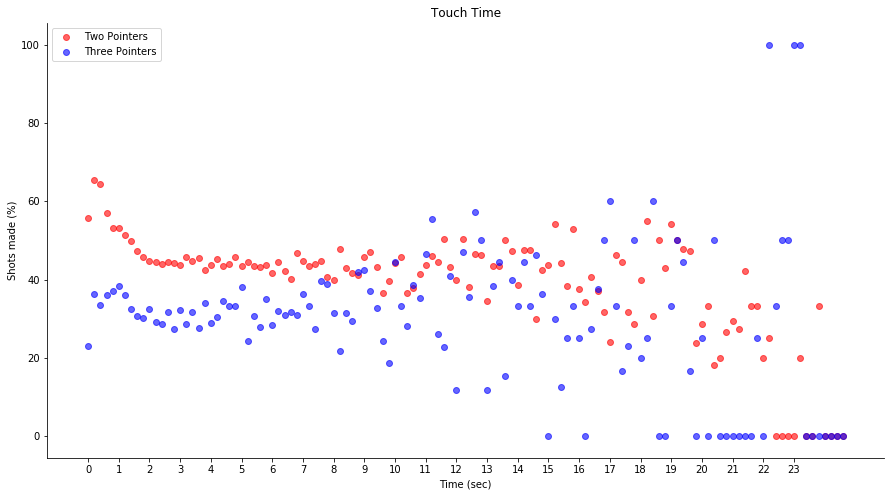

In [13]:
#Plotting
plt.figure(figsize = [15, 8]);

plt.scatter(x = two_pts_by_touch_time.index, y = two_pts_by_touch_time.touch_time_pct, color='r', alpha = 0.6);
plt.xticks(touch_time_plot_labels, touch_time_plot_labels) ; #, rotation = 90);

plt.scatter(x = three_pts_by_touch_time.index, y = three_pts_by_touch_time.touch_time_pct, color='b', alpha = 0.6);
plt.xticks(touch_time_plot_labels, touch_time_plot_labels); #, rotation = 90);
plt.ylabel('Shots made (%)');
plt.title('Touch Time');


plt.legend(shot_types, prop={'size': 10});
plt.xlabel('Time (sec)');
sb.despine(left=False, bottom=False, right=True)

The Two Points shots percentage shows a negative relationship with the touch time.

The shots between 0 and 1 sec have a very high percentage and can be mostly shots like tap-ins or very well studied plays after a Time Out which bring the shooter very close to the basket.

The longer the ball is kept by a player and the lower the shot percentage appears to be.

For the three pointers the negative relationship seems confirmed, but it's probably smaller than for the Two Points.

In this case, plays like screens and the bigger distance from the basket could help the shooter take a "better" shot even after a long time with the ball in their hands.

## The Defender factor

The limited size of the court keeps the competition between attack and defence always on. And here is where tactics (in terms of team plays involving more than one player) come into play.

What's the impact of a defender on the shooting percentage?

In [14]:
# dividing defender distance by bins (considering the whole shots log)
bins_size = np.arange(0, all_shots_copy.close_def_dist.max() + 1, 0.2)
bins_labels = bins_size[:-1]
def_dist_plot_labels = np.arange(0, int(all_shots_copy.close_def_dist.max()) + 1, 3)

# cutting into bins the two and three pts separately
two_pts.loc[:, 'def_dist_bin'] = pd.cut(two_pts.close_def_dist, bins =bins_size, labels = bins_labels, include_lowest = True)
three_pts.loc[:, 'def_dist_bin'] = pd.cut(three_pts.close_def_dist, bins =bins_size, labels = bins_labels, include_lowest = True)

# counting the shots by bin and result
two_pts_by_def_dist = two_pts.groupby(['def_dist_bin', 'shot_result']).count()
three_pts_by_def_dist = three_pts.groupby(['def_dist_bin', 'shot_result']).count()

# turning the series into a dataframe
two_pts_by_def_dist = two_pts_by_def_dist.reset_index()
two_pts_by_def_dist = two_pts_by_def_dist.pivot(index = "def_dist_bin", columns="shot_result", values="game_id")
three_pts_by_def_dist = three_pts_by_def_dist.reset_index()
three_pts_by_def_dist = three_pts_by_def_dist.pivot(index = "def_dist_bin", columns="shot_result", values="game_id")

# setting NaN to 0
two_pts_by_def_dist.loc[two_pts_by_def_dist.missed.isna(), "missed"] = 0
two_pts_by_def_dist.loc[two_pts_by_def_dist.made.isna(), "made"] = 0
three_pts_by_def_dist.loc[three_pts_by_def_dist.missed.isna(), "missed"] = 0
three_pts_by_def_dist.loc[three_pts_by_def_dist.made.isna(), "made"] = 0

# converting the shots count from float to int
two_pts_by_def_dist.loc[:, 'made'] = two_pts_by_def_dist.made.round(0).astype(int)
two_pts_by_def_dist.loc[:, 'missed'] = two_pts_by_def_dist.missed.round(0).astype(int)
three_pts_by_def_dist.loc[:, 'made'] = three_pts_by_def_dist.made.round(0).astype(int)
three_pts_by_def_dist.loc[:, 'missed'] = three_pts_by_def_dist.missed.round(0).astype(int)

# calculating shot percentage by bins
two_pts_by_def_dist.loc[:, 'def_dist_pct'] = two_pts_by_def_dist.made / (two_pts_by_def_dist.made + two_pts_by_def_dist.missed) * 100
two_pts_by_def_dist.loc[two_pts_by_def_dist.def_dist_pct.isna(), "def_dist_pct"] = 0
three_pts_by_def_dist.loc[:, 'def_dist_pct'] = three_pts_by_def_dist.made / (three_pts_by_def_dist.made + three_pts_by_def_dist.missed) * 100
three_pts_by_def_dist.loc[three_pts_by_def_dist.def_dist_pct.isna(), "def_dist_pct"] = 0

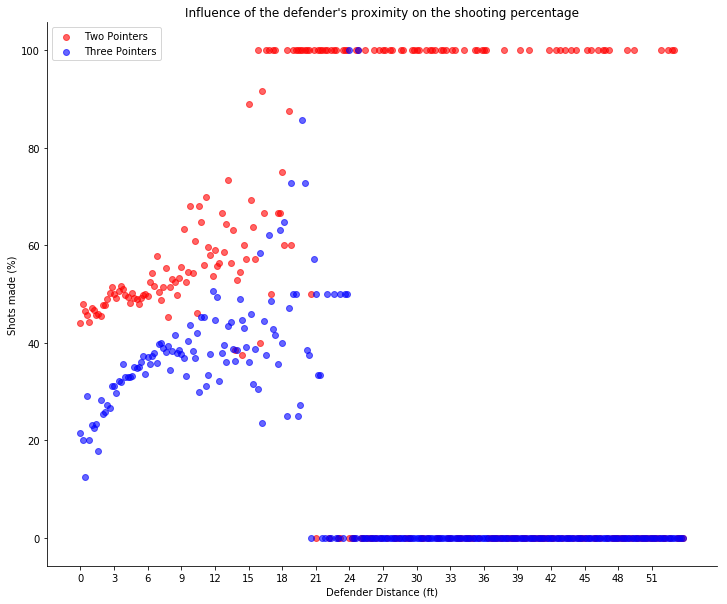

In [15]:
#plotting
plt.figure(figsize = [12, 10]);

plt.scatter(x = two_pts_by_def_dist.index, y = two_pts_by_def_dist.def_dist_pct, color='r', alpha = 0.6);
plt.scatter(x = three_pts_by_def_dist.index, y = three_pts_by_def_dist.def_dist_pct, color='b', alpha = 0.6);

plt.xticks(def_dist_plot_labels, def_dist_plot_labels);
plt.ylabel('Shots made (%)');
plt.xlabel('Defender Distance (ft)');
plt.legend(shot_types, prop={'size': 10});
plt.xlabel('Defender Distance (ft)');
plt.title('Influence of the defender\'s proximity on the shooting percentage');

sb.despine(left=False, bottom=False, right=True)

As we can see, both two pointers and three pointers see a positive relationship between the percentage of shots made and the distance of the defender.

The relationship is very strong until a 7 ft distance (for two pointers) and 10 ft (for three pointers).

There are 100% and 0% shots strongly split between 100% for 2 pointers and 0% for three pointers.

This can be explained because two pointers with a very big defender distance could be fastbreak points (after a steal, for example) where the attacker can run towards the rim with no opposition.

The 0% three pointers are in general shots taken out of desperation at the end of the quarter, hoping in something good to happen!

## The secret to a successful shot

The last plot showed what's probably the strongest relationship: FG% seems influenced by the proximity of a defender and this is valid in both Two Points and Three Points shots.

Since Basketball is a sport of movement, and you can't run with the ball without dribbling it, let's see how dribbles and touch time influence the FG%

In [16]:
# Two Point shots

bins_size = np.arange(0, int(all_shots_copy.close_def_dist.max()) + 1, 5)
bins_labels = bins_size[:-1]

avg_dribbles = two_pts.groupby(['def_dist_bin']).dribbles.mean()

two_pts_by_def_dist['avg_dribbles'] = avg_dribbles
two_pts_by_def_dist.loc[two_pts_by_def_dist.avg_dribbles.isna(), 'avg_dribbles'] = 0

avg_touch_time = two_pts.groupby(['def_dist_bin']).touch_time.mean()
two_pts_by_def_dist['avg_touch_time'] = avg_touch_time

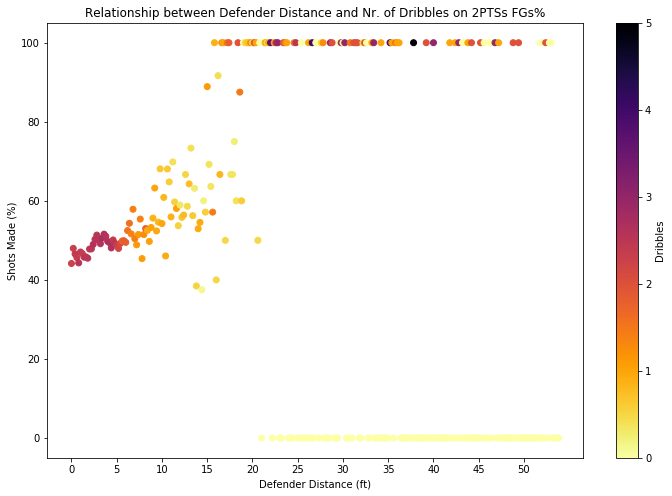

In [17]:
plt.figure(figsize = [12, 8]);
plt.scatter(data = two_pts_by_def_dist, x = two_pts_by_def_dist.index, y = 'def_dist_pct', c = 'avg_dribbles',
            cmap = 'inferno_r');
plt.xticks(bins_size, bins_size);
plt.title('Relationship between Defender Distance and Nr. of Dribbles on 2PTSs FGs%');
plt.xlabel('Defender Distance (ft)');
plt.ylabel('Shots Made (%)');
plt.colorbar(label ="Dribbles");

In [18]:
# Three Point shots

bins_size = np.arange(0, int(all_shots_copy.close_def_dist.max()) + 1, 5)
bins_labels = bins_size[:-1]

avg_dribbles = three_pts.groupby(['def_dist_bin']).dribbles.mean()

three_pts_by_def_dist['avg_dribbles'] = avg_dribbles
three_pts_by_def_dist.loc[three_pts_by_def_dist.avg_dribbles.isna(), 'avg_dribbles'] = 0

avg_touch_time = three_pts.groupby(['def_dist_bin']).touch_time.mean()
three_pts_by_def_dist['avg_touch_time'] = avg_touch_time

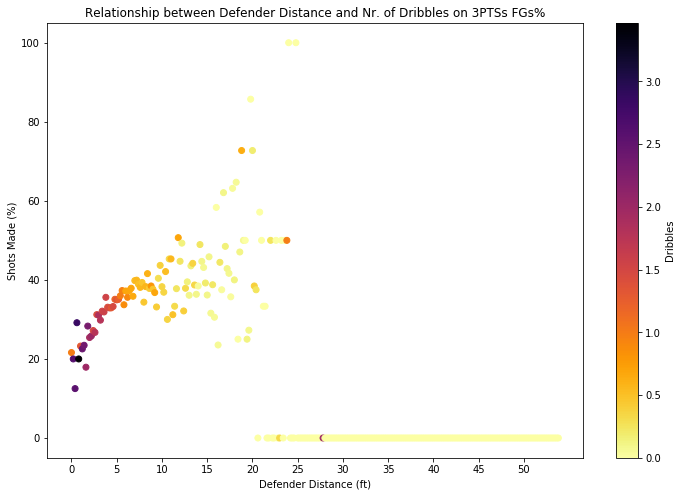

In [19]:
plt.figure(figsize = [12, 8]);
plt.scatter(data = three_pts_by_def_dist, x = three_pts_by_def_dist.index, y = 'def_dist_pct', c = 'avg_dribbles',
            cmap = 'inferno_r');
plt.xticks(bins_size, bins_size);
plt.title('Relationship between Defender Distance and Nr. of Dribbles on 3PTSs FGs%');
plt.xlabel('Defender Distance (ft)');
plt.ylabel('Shots Made (%)');
plt.colorbar(label="Dribbles");

Two Points seem to show a counter-intuitive result, at least in the shots where the defender is closer.<br>
Shots where the defender is 3 to 6 ft away seem to average a higher number of dribbles and still record an increase in the efficiency.<br> This could be because that _extra_ dribble can give the advantage an attacker needs (for example, during a penetration) to take a more efficient shot.

Three pointers respect the "the less the better" rule: dribbling more leads to a shorter distance from the defender, while shots with less dribbles (out of a well studied play) lead to less pressed and more efficient shots.

## Top Performances

Just out of curiosity, I'm filtering out the top Three Points shooters, a hot topic since modern NBA sees new records in the number of Three Pointers taken each year.<br>
We will consider _Top Shooters_ thoese who took at least 300 Three Pointers during the Season and we'll check how they perform in terms of the parameters analised so far.

This could be interesting to see if all the Three Points shooters approach this fundamental in the same way, or there could be different ways for being efficient.

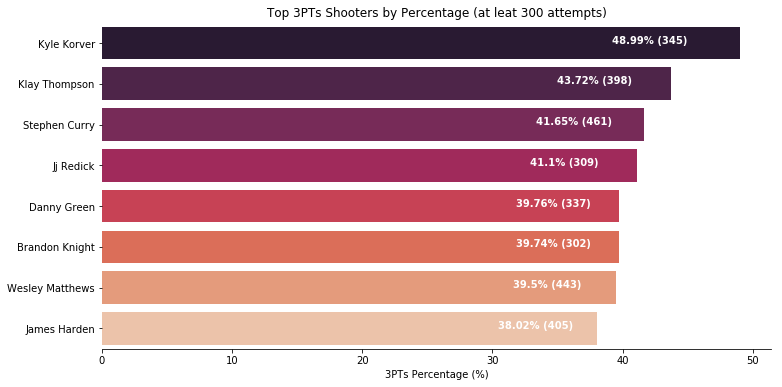

In [20]:
three_pts_copy = three_pts.copy()

top_shooters = three_pts_copy[three_pts_copy.groupby('player_id')['game_id'].transform('size') > 300].player_id.unique()
percentage = three_pts_copy[three_pts_copy.player_id.isin(top_shooters)].groupby(['player_name', 'shot_result']).game_id.count()

# from Series to DataFrame
percentage = percentage.unstack()
percentage['pct'] = percentage.loc[:, 'made'] / (percentage.loc[:, 'made'] + percentage.loc[:, 'missed']) * 100
percentage['shots'] = percentage.loc[:, 'made'] + percentage.loc[:, 'missed']
percentage = percentage.sort_values(by="pct", ascending=True)

# keeping only players with at least 37%
percentage = percentage[percentage.pct >= 37]
percentage = percentage.sort_values(by="pct", ascending=True)

label_perc = ["{}% ({})".format(round(j.pct, 2), int(j.shots)) for i, j in percentage.iterrows()]

plt.figure(figsize = [12, 6]);
plt.title('Top 3PTs Shooters by Percentage (at leat 300 attempts)');


players = percentage.sort_values(by="pct", ascending=False).index
ax = sb.barplot(data=percentage.sort_values("pct", ascending=False), x="pct", y= players, palette="rocket");
plt.xlabel('3PTs Percentage (%)');
ax.set_ylabel('')
y = np.arange(9, 0, -1)
g = len(y)-1

for i,j in percentage.sort_values(by="pct", ascending=False).iterrows():
    ax.text(j.pct-(j.pct*.2), y[g]-1, label_perc[g-1] , color="w", weight="bold");
    g -= 1
    
sb.despine(left=True, bottom=False, right=True)

Kyle Korver is by far the best performer (48.99% over 345 shots), followed by the _Splash Brothers_ Klay Thompson and Steph Curry.

It's interesting to see that the top 8 players aren't all the same _kind_ of players.
Korver is a specialist, someone with exceptional shooting skills but lacking in several other parts of the Game. We could say the same about JJ Redick and somehow Danny Green (Klay Thompson, in my opinion, is a quite halfway: an amazing shooter with good defensive skills as well).

But better ball handlers like James Harden or Steph Curry shoot with excellent percentages too.

In [21]:
top_3p = percentage.index
by_dist = three_pts_copy[three_pts_copy.player_name.isin(top_3p)].groupby('player_name').shot_dist.mean().sort_values(ascending=False)
by_def_dist = three_pts_copy[three_pts_copy.player_name.isin(top_3p)].groupby('player_name').close_def_dist.mean().sort_values(ascending=False)
by_touch_time = three_pts_copy[three_pts_copy.player_name.isin(top_3p)].groupby('player_name').touch_time.mean().sort_values(ascending=False)
by_dribbles = three_pts_copy[three_pts_copy.player_name.isin(top_3p)].groupby('player_name').dribbles.mean().sort_values(ascending=False)

### Distance

The difference in terms of distance is not very pronounced between the top shooters. Steph Curry is the leader, but the 8th of the list (JJ Redick) shoots on average 1.3 ft closer.

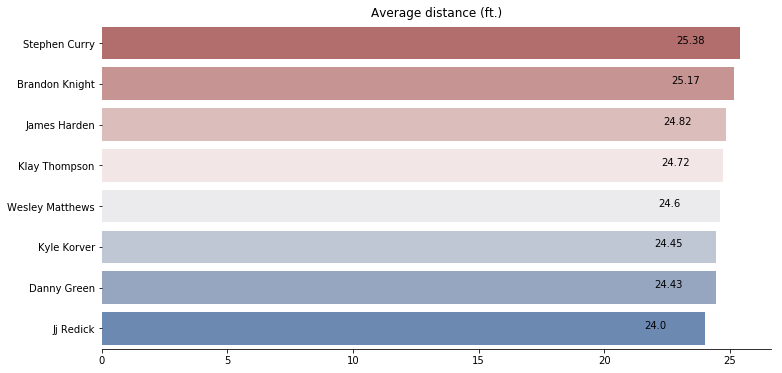

In [22]:
plt.figure(figsize = [12, 6]);
plt.title('Average distance (ft.)');
label_dist = [round(j, 2) for i, j in by_dist.sort_values(ascending=True).iteritems()]

ax = sb.barplot( x = by_dist, y = by_dist.index, palette="vlag_r");
ax.set_xlabel('')
ax.set_ylabel('')
y = np.arange(9, 0, -1)
g = len(y)-1

for i,j in by_dist.sort_values(ascending=False).iteritems():
    ax.text(j -(j *.1), y[g]-1, label_dist[g-1] , color="black");
    g -= 1 
    
sb.despine(left=True, bottom=False, right=True)

### Distance from the Defender

Danny Green excels in getting rid of the defender, averaging shoots with the defender 6.33 ft away. The second best performer is JJ Redick, a _specialist_ able to benefit the plays studied to free him for a shot.<br>
The 8th place belongs to James Harden and this result won't surprise you, after you've watched the following two plots.

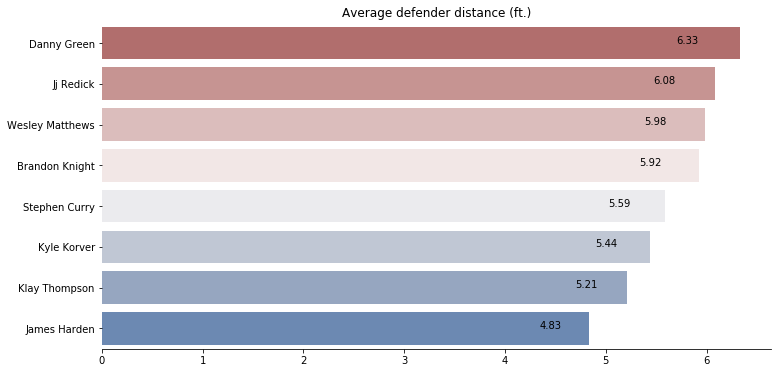

In [23]:
plt.figure(figsize = [12, 6]);
plt.title('Average defender distance (ft.)');
label_dist = [round(j, 2) for i, j in by_def_dist.sort_values(ascending=True).iteritems()]

ax = sb.barplot( x = by_def_dist, y = by_def_dist.index, palette="vlag_r");
ax.set_xlabel('')
ax.set_ylabel('')
y = np.arange(9, 0, -1)
g = len(y)-1

for i,j in by_def_dist.sort_values(ascending=False).iteritems():
    ax.text(j - (j *0.1), y[g]-1, label_dist[g-1] , color="black");
    g -= 1 
    
sb.despine(left=True, bottom=False, right=True)

### Touch Time

This plot shows an interesting difference in the style of play between the _leader_ James Harden, who keeps the ball on average over 1.5 seconds more than the second and the third shooters in the list.<br>Furthermore, Kyle Korver is definitely a lethal specialist, keeping the ball in his hands less than a second and scoring almost half of the shots he takes!

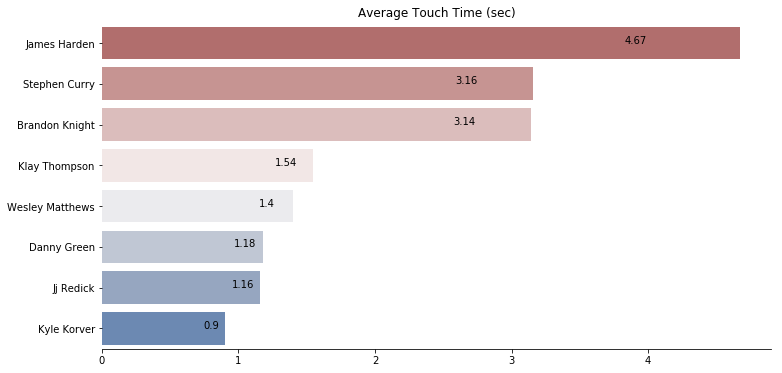

In [24]:
plt.figure(figsize = [12, 6]);

plt.title('Average Touch Time (sec)');
label_touch_time = [round(j, 2) for i, j in by_touch_time.sort_values(ascending=True).iteritems()]

ax = sb.barplot( x = by_touch_time, y = by_touch_time.index, palette="vlag_r");
ax.set_xlabel('')
ax.set_ylabel('')
y = np.arange(9, 0, -1)
g = len(y)-1

for i,j in by_touch_time.sort_values(ascending=False).iteritems():
    ax.text(j -(j *.18), y[g]-1, label_touch_time[g-1] , color="black");
    g -= 1 
    
sb.despine(left=True, bottom=False, right=True)

### Dribbles

This plot confirms what seen in the previous one: we have star players like James Harden, who concentrates the attack on his hands dribbling on average 3.65 times before a shot, or other _playmaker-like_ players like Steph Curry and Brandon Knight.<br>
And then there are the Three Points specialists, who are on the court waiting for their chance to shot and see nothing but the net!

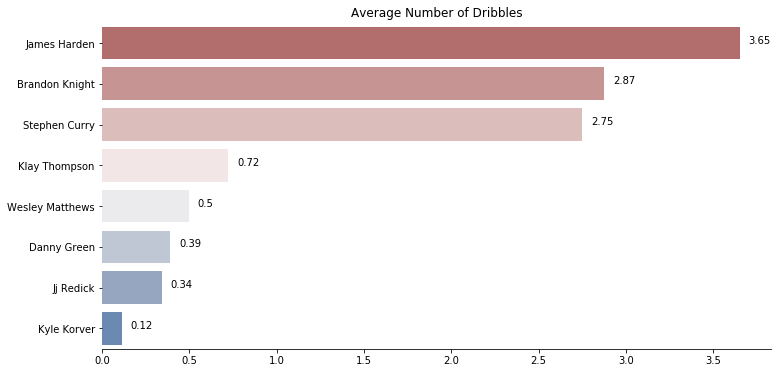

In [25]:
plt.figure(figsize = [12, 6]);

plt.title('Average Number of Dribbles');
label_dribbles = [round(j, 2) for i, j in by_dribbles.sort_values(ascending=True).iteritems()]

ax = sb.barplot( x = by_dribbles, y = by_dribbles.index, palette="vlag_r");
ax.set_xlabel('')
ax.set_ylabel('')
y = np.arange(9, 0, -1)
g = len(y)-1

for i,j in by_dribbles.sort_values(ascending=False).iteritems():
    ax.text(j + 0.05, y[g]-1, label_dribbles[g-1] , color="black");
    g -= 1 
    
sb.despine(left=True, bottom=False, right=True)

These extra statistics show strongly the personality or the skills of the players.

Already in the Season 2014/2015 _James Harden_ was showing his attitude in keeping the ball for a long time (and a long number of dribbles) and yet shooting many three pointers (third overall).<br>

The above mentioned _Splash Brothers_ as well, show _Steph Curry_ as a better ball handler and someone who can score Three Pointers from crazy distance (the highest on average), while _Klay Thompson_ is always there ready to catch and shoot, keeping the ball 1.5 seconds and less than a dribble.

_Kyle Korver_ has been really impressive during the 2014/2015 season, a bright example of what a high level _role player_ should be: shooting the 49% over almost 350 shots _never dribbling_ and keeping the ball for less than a second make you understand that whenever he gets the ball wide open there's not much left to do for his opponents _but pray_!